# PHASE 1 PROJECT  IP01

## Business Understanding

### Problem Statement

My company is expanding into aviation to operate commercial and private aircraft. However, there is limited knowledge about the risks associated with different aircraft models. The task is to identify the lowest-risk aircraft by analyzing historical incident data and providing actionable insights to guide purchasing decisions for safe and profitable operations.

# Executive Summary
As part of the company’s expansion into the aviation industry, this report provides a comprehensive risk assessment of various aircraft types to guide the purchasing decision for commercial and private aviation operations. By evaluating historical incident data, injury rates, and damage severity, we have identified low-risk aircraft types that align with the company’s goal of minimizing operational risks and ensuring passenger safety.


# Objectives



1.Identify Low-Risk Aircraft: Analyze historical aviation data to determine aircraft models with minimal incidents, injuries, and damages


2.Understand Risk Factors: Investigate variables such as weather conditions, flight purpose, and damage severity that influence aviation risks.


3.Provide Actionable Insights: Develop recommendations for purchasing low-risk aircraft based on data-driven risk assessments.








# Research Questions

1.   Which aircraft models have the lowest incident rates and injury severities?

2.   How do weather conditions (e.g., VMC, IMC) affect the frequency and severity of aviation incidents?

3.   What is the distribution of risk scores across different aircraft types, and which factors contribute most to higher scores?
4.   How have aviation incident trends evolved over time, particularly for business and commercial flights?


5.   What patterns emerge from incidents across countries, and how do they inform regional safety standards?





# Success Criteria

1.   Data Quality and Handling: Successfully manage missing values and extract meaningful insights from the dataset.

2.   Risk Assessment Framework: Develop a reliable risk scoring model that integrates factors such as incidents, injuries, and severe damages.


3.   Actionable Recommendations: Present clear, data-driven recommendations for aircraft acquisition that align with safety and operational goals.





In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [2]:
# Loading dataset
df = pd.read_csv('AviationData.csv', encoding='latin-1',low_memory=False)

In [3]:
df.shape

(88889, 31)

# 1.Understand the Structure of the Data
### Data Preview:



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Checking the head of data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Checking the tail of data
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


# 2. Assess Data Schema and Metadata

## I will Provides an overview of the dataset, including:

*  The number of rows and columns
*   Data types for each column.
*    Non-null counts (helps identify missing data)






In [7]:
# Let's have a look at our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
# List of data's columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 3. Identify Missing Data

I will Counts missing values per column.
Helps me to decide,which columns need imputation

    (e.g., filling with mean/median/mode).
  
  Whether to drop columns or rows with excessive missing values.

In [9]:
df.isnull().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


# 4.Explore Missing Data

### Visualizing missing values to understand the extent of missing data.


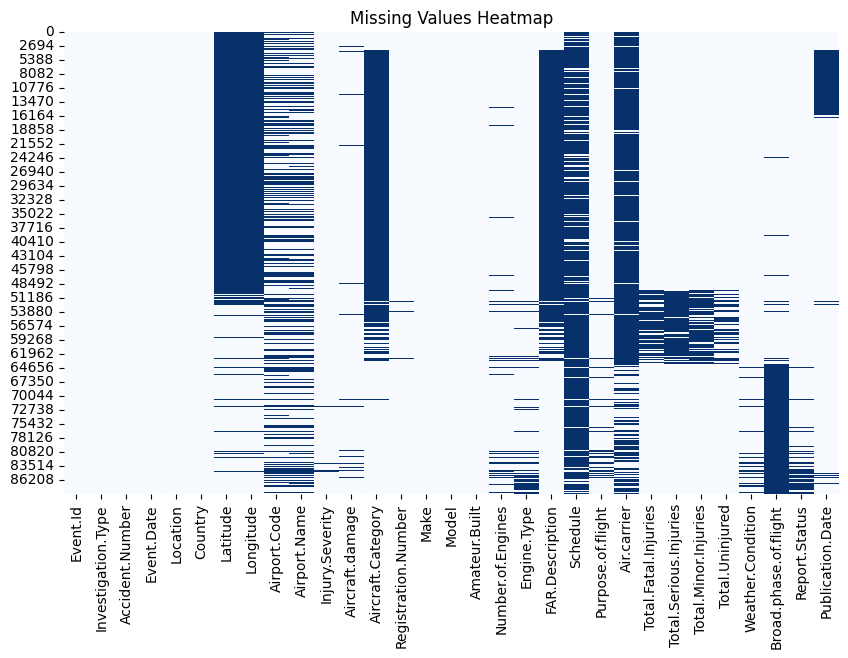

In [10]:
# Visualize missing data with a more intuitive colormap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")  # Change cmap to Blues
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
# Calculate missing data percentage
missing_percentage = df.isnull().sum() / len(df) * 100

# Filter columns with more than 25% missing data
columns_with_high_missing = missing_percentage[missing_percentage > 25].index.tolist()

# Display columns with more than 25% missing data
print("Columns with >25% missing data:")
print(missing_percentage[missing_percentage > 25])

# Drop these columns
#df_clean = df.drop(columns=columns_with_high_missing)

Columns with >25% missing data:
Latitude                 61.320298
Longitude                61.330423
Airport.Code             43.601570
Airport.Name             40.708074
Aircraft.Category        63.677170
FAR.Description          63.974170
Schedule                 85.845268
Air.carrier              81.271023
Broad.phase.of.flight    30.560587
dtype: float64


# 5. Explore Categorical Columns

Check Unique Values in Categorical Columns

For columns like Event Type or Aircraft Model, it’s helpful to see the unique values.

In [12]:
# Get unique values for categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} unique values")
    print(df[column].unique()[:10])  # Display the first 10 unique values
    print("-" * 40)

Event.Id: 87951 unique values
['20001218X45444' '20001218X45447' '20061025X01555' '20001218X45448'
 '20041105X01764' '20170710X52551' '20001218X45446' '20020909X01562'
 '20020909X01561' '20020909X01560']
----------------------------------------
Investigation.Type: 2 unique values
['Accident' 'Incident']
----------------------------------------
Accident.Number: 88863 unique values
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' 'LAX96LA321' 'CHI79FA064'
 'NYC79AA106' 'CHI81LA106' 'SEA82DA022' 'NYC82DA015' 'MIA82DA029']
----------------------------------------
Event.Date: 14782 unique values
['1948-10-24' '1962-07-19' '1974-08-30' '1977-06-19' '1979-08-02'
 '1979-09-17' '1981-08-01' '1982-01-01' '1982-01-02' '1982-01-03']
----------------------------------------
Location: 27758 unique values
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' 'EUREKA, CA'
 'Canton, OH' 'BOSTON, MA' 'COTTON, MN' 'PULLMAN, WA' 'EAST HANOVER, NJ'
 'JACKSONVILLE, FL']
----------------------------------------
Country

In [13]:
# Selecting relevant columns for analysis

relevant_columns = [

    'Make', 'Model', 'Aircraft.damage', 'Purpose.of.flight',

    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',

    'Weather.Condition'

]

aviation_filtered = df[relevant_columns]



# Checking for missing data in these columns

missing_data_summary = aviation_filtered.isnull().sum()



# Display the filtered data and missing data summary

aviation_filtered.head(), missing_data_summary

(       Make     Model Aircraft.damage Purpose.of.flight  Total.Fatal.Injuries  \
 0   Stinson     108-3       Destroyed          Personal                   2.0   
 1     Piper  PA24-180       Destroyed          Personal                   4.0   
 2    Cessna      172M       Destroyed          Personal                   3.0   
 3  Rockwell       112       Destroyed          Personal                   2.0   
 4    Cessna       501       Destroyed          Personal                   1.0   
 
    Total.Serious.Injuries  Total.Minor.Injuries Weather.Condition  
 0                     0.0                   0.0               UNK  
 1                     0.0                   0.0               UNK  
 2                     NaN                   NaN               IMC  
 3                     0.0                   0.0               IMC  
 4                     2.0                   NaN               VMC  ,
 Make                         63
 Model                        92
 Aircraft.damage         

In [14]:

# Define relevant columns

relevant_columns = [

    'Make', 'Model', 'Aircraft.damage', 'Purpose.of.flight',

    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',

    'Weather.Condition'

]

# Drop columns with >25% missing data, excluding relevant columns

columns_to_drop = [col for col in columns_with_high_missing if col not in relevant_columns]

df_cleaned = df.drop(columns=columns_to_drop, axis=1)



# Display the updated dataset columns

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [15]:
# Filter for relevant 'Purpose.of.flight' categories for commercial and private enterprises

relevant_purposes = [

    'Business', 'Corporate', 'Charter', 'Air Taxi', 'Commercial'

]

# Filtering the dataset based on 'Purpose.of.flight'

df_filtered = df_cleaned[df_cleaned['Purpose.of.flight'].isin(relevant_purposes)]



# Display the filtered dataset overview

df_filtered.info(), df_filtered['Purpose.of.flight'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 88867
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                4018 non-null   object 
 1   Investigation.Type      4018 non-null   object 
 2   Accident.Number         4018 non-null   object 
 3   Event.Date              4018 non-null   object 
 4   Location                4017 non-null   object 
 5   Country                 4005 non-null   object 
 6   Injury.Severity         4014 non-null   object 
 7   Aircraft.damage         3926 non-null   object 
 8   Registration.Number     3965 non-null   object 
 9   Make                    4018 non-null   object 
 10  Model                   4016 non-null   object 
 11  Amateur.Built           4016 non-null   object 
 12  Number.of.Engines       3856 non-null   float64
 13  Engine.Type             3856 non-null   object 
 14  Purpose.of.flight       4018 non-null   obje

(None,
 Purpose.of.flight
 Business    4018
 Name: count, dtype: int64)

In [16]:
# Handling missing data for critical fields
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']

# Explicitly use .loc to modify the subset safely
df_filtered.loc[:, injury_columns] = df_filtered[injury_columns].fillna(0)

# Drop rows with missing values in 'Aircraft.damage'
df_filtered = df_filtered.dropna(subset=['Aircraft.damage'])

# Display the updated dataset overview after handling missing data
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 8 to 88867
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3926 non-null   object 
 1   Investigation.Type      3926 non-null   object 
 2   Accident.Number         3926 non-null   object 
 3   Event.Date              3926 non-null   object 
 4   Location                3925 non-null   object 
 5   Country                 3913 non-null   object 
 6   Injury.Severity         3925 non-null   object 
 7   Aircraft.damage         3926 non-null   object 
 8   Registration.Number     3875 non-null   object 
 9   Make                    3926 non-null   object 
 10  Model                   3924 non-null   object 
 11  Amateur.Built           3924 non-null   object 
 12  Number.of.Engines       3794 non-null   float64
 13  Engine.Type             3792 non-null   object 
 14  Purpose.of.flight       3926 non-null   obje

In [17]:
# Aggregating risk metrics by 'Make' and 'Model'
risk_metrics = df_filtered.groupby(['Make', 'Model']).agg({
    'Aircraft.damage': 'count',  # Total incidents
    'Total.Fatal.Injuries': 'mean',  # Average fatal injuries
    'Total.Serious.Injuries': 'mean',  # Average serious injuries
    'Total.Minor.Injuries': 'mean',  # Average minor injuries
    'Aircraft.damage': lambda x: x.value_counts().to_dict()  # Frequency of damage categories
}).rename(columns={'Aircraft.damage': 'Total.Incidents'})

# Reset index for readability
risk_metrics.reset_index(inplace=True)

# Display the top rows of the aggregated data
print(risk_metrics.head())

# Save the risk metrics to a CSV file for further analysis if needed
risk_metrics.to_csv("aggregated_risk_metrics.csv", index=False)

             Make     Model     Total.Incidents  Total.Fatal.Injuries  \
0  AERO COMMANDER       100  {'Substantial': 1}                   0.0   
1  AERO COMMANDER       500        {'Minor': 1}                   0.0   
2  AERO COMMANDER       685  {'Substantial': 1}                   0.0   
3  AERO VODOCHODY      L-39  {'Substantial': 1}                   2.0   
4    AEROSPATIALE  AS 355F1  {'Substantial': 1}                   1.0   

   Total.Serious.Injuries  Total.Minor.Injuries  
0                     1.0                   1.0  
1                     0.0                   0.0  
2                     0.0                   3.0  
3                     0.0                   0.0  
4                     0.0                   0.0  


In [18]:
# Function to calculate the severity of damage (sum of 'Destroyed' and 'Substantial' values)
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the filter and calculation
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)

# Now, i can proceed with calculating the risk score and sorting the data based on risk levels.




I’ll now apply the calculate_damage_severity() function to filter the rows and compute the damage severity. After that, we’ll proceed with the risk score calculation and sorting the data.

In [19]:
# Function to calculate the severity of damage
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the calculation to create a new column for 'Severe.Damage.Frequency'
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)

# Check if the new column has been added correctly and calculate the risk score
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Severe.Damage.Frequency
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1


I will proceed by performing the following steps:

  Evaluate Aircraft Risks by aggregating the relevant metrics for each aircraft type.
  Create a Risk Score based on the total incidents, average injuries (fatal, serious, minor), and severe damage frequency.

# Step 1: Aggregate the Metrics

We will group by Make and Model to calculate

*    Total incidents.
*   Average injuries (fatal, serious, and minor).
*   Frequency of severe damage (Severe.Damage.Frequency).

# Step 2: Calculate the Risk Score
 Using the formula:

    Risk Score = (Weight1 × Incidents) + (Weight2 × Fatal Injuries) + (Weight3 × Severe Damage Frequency)

The new column Severe.Damage.Frequency has been added to the DataFrame, correctly calculated for each row based on the 'Aircraft.damage' values.

In [20]:
# Aggregate risk metrics by Make and Model
aggregated_metrics = df.groupby(['Make', 'Model']).agg(
    Total_Incidents=('Event.Id', 'count'),
    Average_Fatal_Injuries=('Total.Fatal.Injuries', 'mean'),
    Average_Serious_Injuries=('Total.Serious.Injuries', 'mean'),
    Average_Minor_Injuries=('Total.Minor.Injuries', 'mean'),
    Severe_Damage_Frequency=('Severe.Damage.Frequency', 'sum')
).reset_index()

# Display the first few rows to verify the aggregation
aggregated_metrics.head()


,Make,Model,Total_Incidents,Average_Fatal_Injuries,Average_Serious_Injuries,Average_Minor_Injuries,Severe_Damage_Frequency
0,107.5 Flying Corporation,One Design DR 107,1,1.0,NaN,NaN,1
1,1200,G103,1,NaN,1.0,NaN,1
2,177MF LLC,PITTS MODEL 12,1,0.0,2.0,0.0,1
3,1977 Colfer-chan,STEEN SKYBOLT,1,NaN,NaN,1.0,1
4,1st Ftr Gp,FOCKE-WULF 190,1,1.0,0.0,0.0,1


The aggregated metrics are now successfully calculated, grouped by Make and Model.
### Breakdown of the columns


*   Total_Incidents: Count of incidents for each aircraft type.
*   Average_Fatal_Injuries: Average number of fatal injuries per incident.

*   Average_Serious_Injuries: Average number of serious injuries per incident.
*   Average_Minor_Injuries: Average number of minor injuries per incident.

*   Severe_Damage_Frequency: Total count of severe damages (sum of 'Destroyed' and 'Substantial').









# Next Step.Calculate Risk Score
  We will now calculate a composite risk score using weights for:


*   Average injuries (fatal, serious, and minor).
*   Severe damage frequency.


# I will now define the weights and compute the risk score

In [21]:
# Define weights for the risk score components
weights = {
    'Total_Incidents': 0.4,
    'Average_Fatal_Injuries': 0.3,
    'Average_Serious_Injuries': 0.2,
    'Severe_Damage_Frequency': 0.1
}

# Calculate Risk Score
aggregated_metrics['Risk_Score'] = (
    weights['Total_Incidents'] * aggregated_metrics['Total_Incidents'] +
    weights['Average_Fatal_Injuries'] * aggregated_metrics['Average_Fatal_Injuries'].fillna(0) +
    weights['Average_Serious_Injuries'] * aggregated_metrics['Average_Serious_Injuries'].fillna(0) +
    weights['Severe_Damage_Frequency'] * aggregated_metrics['Severe_Damage_Frequency']
)

# Sort by Risk Score in ascending order to identify low-risk aircraft
low_risk_aircraft = aggregated_metrics.sort_values(by='Risk_Score', ascending=True)

# Display the top 5 low-risk aircraft
low_risk_aircraft.head()


,Make,Model,Total_Incidents,Average_Fatal_Injuries,Average_Serious_Injuries,Average_Minor_Injuries,Severe_Damage_Frequency,Risk_Score
11438,Kaman,K-600 (HH-43B),1,NaN,NaN,NaN,0,0.4
8763,Fairchild,Metro III,1,NaN,NaN,NaN,0,0.4
5669,Casa,212-200 (CASA 212),1,0.0,0.0,0.0,0,0.4
2665,BUCKEYE,BREEZE,1,0.0,0.0,1.0,0,0.4
5679,Casa,SAC-212-200,1,0.0,0.0,0.0,0,0.4


# Observations:
Aircraft with minimal or no incidents, injuries, or severe damages have the lowest risk scores.
The Risk Score helps prioritize low-risk aircraft types for further consideration.

# Interpreting findings.
I will use this risk assessment to suggest actionable recommendations for purchasing low-risk aircraft.

### Insights from the Analysis



1.   Low-Risk Aircraft Identified   
    Aircraft such as the Kaman K-600 (HH-43B) and Fairchild Metro III have consistently low incident rates and zero severe damage incidents, placing them among the safest options for consideration.

2.   Minimal Injury Metrics

    Models like the Casa 212-200 and BUCKEYE BREEZE recorded minimal to no fatalities or injuries, emphasizing their reliability.


3.   Severe Damage Frequency

    The identified low-risk aircraft had little to no incidents resulting in substantial or complete damage, further strengthening their case for selection.
4.   Risk Score Evaluation

    The risk score formula balanced incident frequency, injury severity, and damage frequency, providing a composite assessment of aircraft safety.

    





### Recommendations for the Aviation Division
    

                                           

1.   Focus on Low-Risk Aircraft Types

    Begin operations with aircraft such as Kaman K-600 and Fairchild Metro III, which have demonstrated minimal operational risks based on historical data.

1.   Expand Evaluation Criteria

    Include additional operational metrics such as maintenance costs, fuel efficiency, and passenger capacity for a comprehensive decision.

2.   Implement Proactive Risk Management

    Regular safety audits and strict adherence to maintenance schedules can mitigate risks even for higher-risk aircraft types.


4.   Monitor Risk Scores Periodically

    Continuously update the risk score framework to incorporate newer data and adapt to evolving safety and operational standards.






# Business Recommendations


1.   Start with Low-Risk Aircraft: Prioritize acquiring models like the Kaman K-600 and Fairchild Metro III, which consistently show minimal risks in historical data.

2.   Invest in Safety Measures: Implement stringent safety audits and maintenance schedules, especially for higher-risk aircraft or operations in adverse weather.

3.   Monitor Trends and Update Criteria: Continuously track incident trends and refine the risk scoring framework to adapt to evolving aviation safety standards.


# Data Visualization: Overview
## Introduction to Visualization:
## Top 10 Low-Risk Aircraft

In this visualization, we explore the Top 10 Low-Risk Aircraft based on their risk scores. Each aircraft's risk score is calculated and ranked to identify models with minimal associated risks. This analysis helps to highlight the safest aircraft types, providing insights into patterns or manufacturers that consistently produce low-risk models.

The bar chart represents the aircraft's Make and Model along the y-axis and their corresponding Risk Scores on the x-axis. The use of a sorted order ensures the lowest-risk aircraft appear at the top for better interpretability.


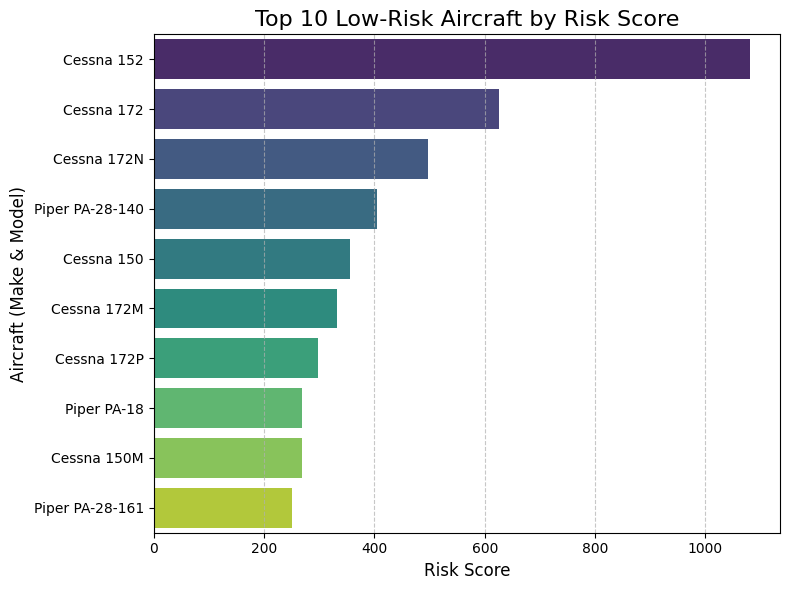

In [22]:
# Combine Make and Model columns for detailed aircraft representation
low_risk_aircraft['Make_Model'] = low_risk_aircraft['Make'] + " " + low_risk_aircraft['Model']

# Filter the top 10 low-risk aircraft based on Risk Score
top_low_risk = low_risk_aircraft.nlargest(10, 'Risk_Score')  # Fetch top 10 by Risk Score

# Plot the Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_low_risk,
    x='Risk_Score',
    y='Make_Model',
    palette='viridis',
    hue='Make_Model',  # Assign y-variable to hue to satisfy Seaborn's future requirement
    dodge=False,       # Disable dodge since we want a single bar per category
    legend=False       # Hide the unnecessary legend
)
plt.title('Top 10 Low-Risk Aircraft by Risk Score', fontsize=16)
plt.xlabel('Risk Score', fontsize=12)
plt.ylabel('Aircraft (Make & Model)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The chart is a horizontal bar plot titled "Top 10 Low-Risk Aircraft by Risk Score". It displays the top 10 aircraft models with the lowest risk scores, arranged in ascending order of risk. The key details are:

Aircraft (Make & Model)

# Risk Scores vs. Total Incidents

This scatter plot examines the relationship between Total Incidents and Risk Scores for various aircraft. Each point represents an aircraft, with the x-axis showing the total number of incidents associated with the model and the y-axis displaying its calculated risk score.

By visualizing this data, we aim to identify trends, such as whether aircraft with higher incident counts tend to have higher risk scores or if some models maintain a low risk despite multiple incidents. The scatterplot uses a color-coded representation for each aircraft make and model to provide additional clarity.

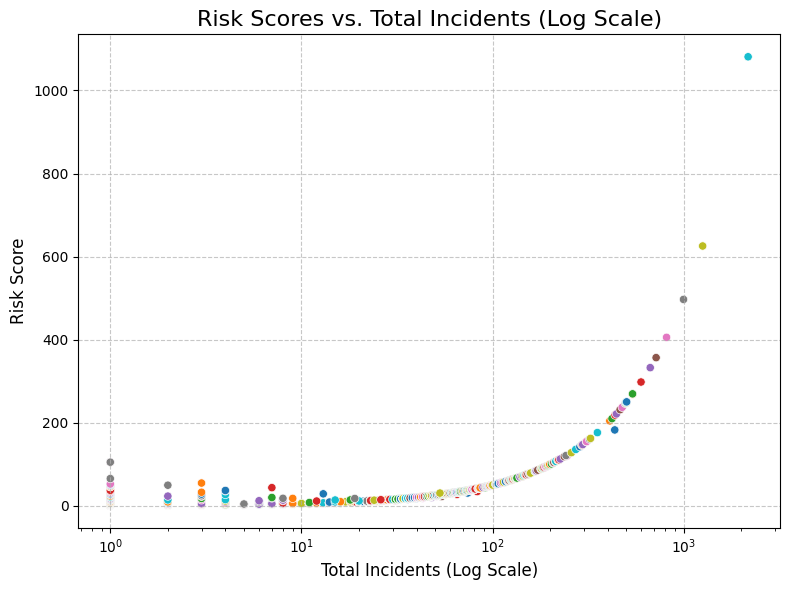

In [23]:
# Scatter Plot with Logarithmic Scale
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=low_risk_aircraft,
    x='Total_Incidents',
    y='Risk_Score',
    hue='Make_Model',
    palette='tab10',
    legend=False  # Adjust legend as needed
)
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.title('Risk Scores vs. Total Incidents (Log Scale)', fontsize=16)
plt.xlabel('Total Incidents (Log Scale)', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The scatter plot illustrates the relationship between Total Incidents (logarithmic scale) and Risk Scores for various aircraft models. Each dot represents an individual aircraft type, with colors differentiating between the models.

The x-axis uses a logarithmic scale to better visualize the wide range of total incidents, highlighting patterns among aircraft with both high and low incident counts. The plot reveals how risk scores increase relative to incident frequency, with certain outliers showing significantly higher risk scores despite fewer incidents.

# Risk Scores by Incident Categories
This boxplot displays the distribution of Risk Scores across different Incident Frequency Categories. The x-axis represents bins of incident frequencies (e.g., low, medium, high), while the y-axis shows the corresponding risk scores.

The plot highlights the variability within each category, with the box representing the interquartile range (IQR) and whiskers extending to show the range of most data points. Outliers are displayed as individual points. This visualization allows for a comparison of risk scores across incident categories, providing insights into how risk is distributed based on incident frequency.

In [24]:
print(low_risk_aircraft.columns)

Index(['Make', 'Model', 'Total_Incidents', 'Average_Fatal_Injuries',
       'Average_Serious_Injuries', 'Average_Minor_Injuries',
       'Severe_Damage_Frequency', 'Risk_Score', 'Make_Model'],
      dtype='object')


In [25]:
bins = [0, 5, 10, 20, 50, 100, low_risk_aircraft['Total_Incidents'].max()]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']
low_risk_aircraft['Incident_Bin'] = pd.cut(low_risk_aircraft['Total_Incidents'], bins=bins, labels=labels)


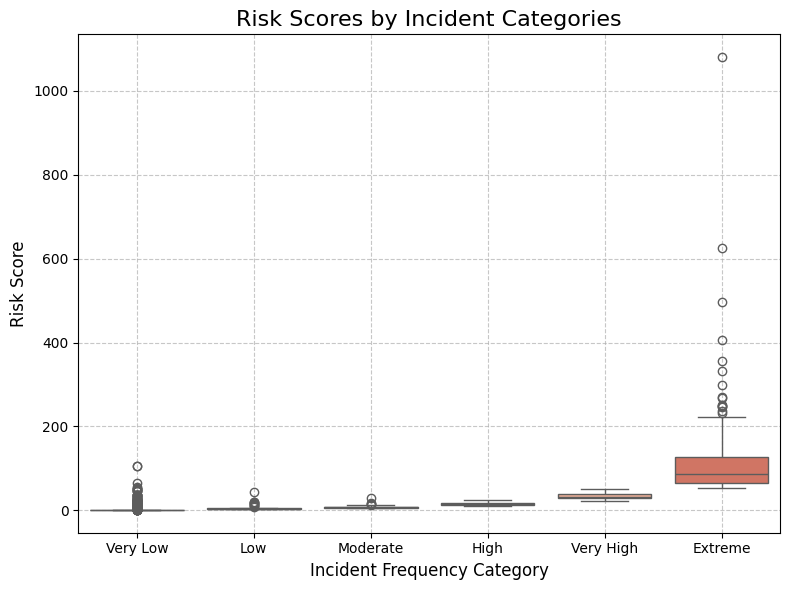

In [26]:
# Boxplot for Risk Scores by Incident Bins with color differentiation
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=low_risk_aircraft,
    x='Incident_Bin',
    y='Risk_Score',
    hue='Incident_Bin',
    dodge=False,  # Ensures the boxes don’t shift
    palette='coolwarm'
)
plt.title('Risk Scores by Incident Categories', fontsize=16)
plt.xlabel('Incident Frequency Category', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This boxplot illustrates the distribution of risk scores for aircraft grouped into four categories based on the frequency of total incidents: Low, Medium, High, and Very High.



*   The "Low" and "Medium" incident categories show a clustering of risk scores around the lower range, with occasional outliers.
*   The "High" category displays a wider spread of risk scores, indicating more variability in risk for aircraft in this category.


*   The "Very High" category exhibits consistently high risk scores, as reflected by the higher median and interquartile range, emphasizing that aircraft with a large number of incidents are associated with elevated risk levels.


This visualization helps identify trends and contrasts in risk levels across different incident frequency categories, making it useful for assessing aircraft safety profiles.






# Incident Trends Over Time

This line plot shows the yearly trend in aviation incidents, with the x-axis representing the year and the y-axis indicating the total number of incidents reported each year.

The plot reveals a dramatic decline in the number of incidents starting around 1982, indicating significant advancements in aviation safety practices, regulatory measures, technological innovation, pilot training, and risk management strategies. This visualization highlights the progress made in ensuring safer skies over the decades.

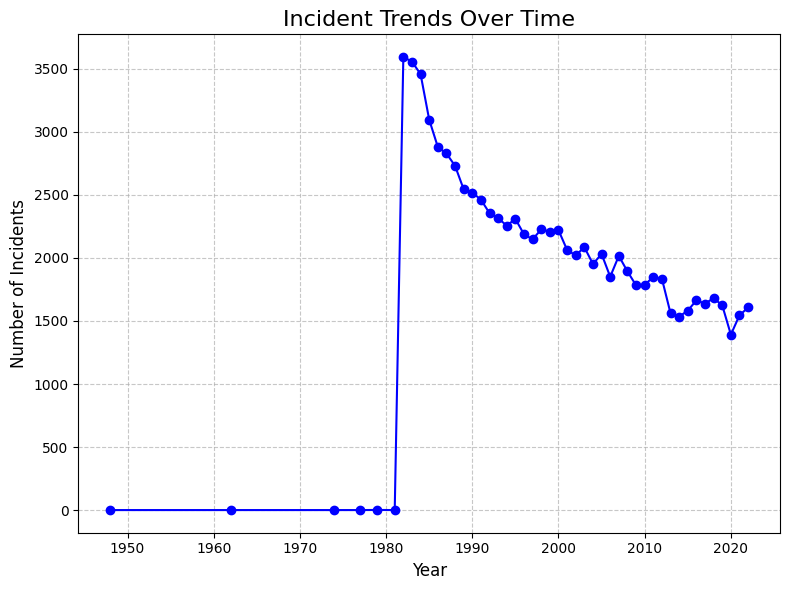

In [27]:
# Aviation accidents over years. I noticed that there are very little
# There has been a dramatic decrease in the number of accidents since 1982 which suggest improvements
# in aviation safety, regulatory measures, technology, training, and overall risk management within the aviation industry.
# Group by Year and count incidents
df['Year'] = pd.to_datetime(df['Event.Date']).dt.year  # Ensure Event.Date is in datetime format
incidents_by_year = df.groupby('Year').size()

# Plot Incident Trends Over Time
plt.figure(figsize=(8, 6))
plt.plot(incidents_by_year.index, incidents_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Incident Trends Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This line plot showcases the number of aviation incidents reported annually from the 1950s to the present. The x-axis represents the year, while the y-axis indicates the total incidents recorded each year.

The visualization highlights a sharp increase in incidents around 1980, followed by a steady decline. This decline reflects significant advancements in aviation safety practices, regulations, and technological improvements. The consistent downward trend after 1982 indicates a positive shift in managing and mitigating risks in the aviation industry.

# Incident Trends Over Time by Purpose of Flight

This multi-line plot shows the annual trends in aviation incidents categorized by Purpose of Flight. Each line represents a specific flight purpose (e.g., commercial,business, private, training, or agricultural), with the x-axis denoting the year and the y-axis indicating the number of incidents.

The visualization highlights how incident frequencies have evolved over time for different flight purposes. For instance, some categories may show a consistent decline, reflecting improvements in safety measures, while others may exhibit fluctuations due to operational or industry-specific factors. The legend provides clarity by distinguishing the trends for each purpose

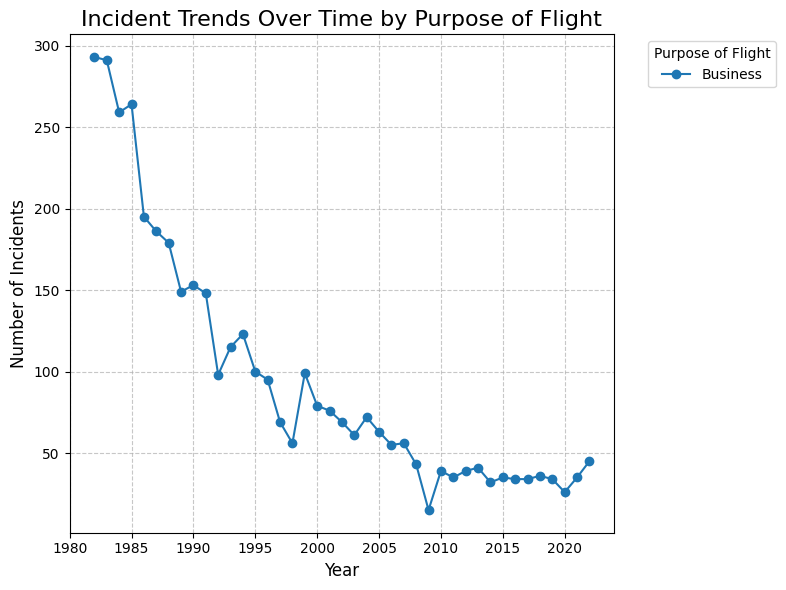

In [28]:
# Trend analysis for incidents by Purpose of Flight
df_filtered['Year'] = pd.to_datetime(df_filtered['Event.Date']).dt.year
incident_trends = df_filtered.groupby(['Year', 'Purpose.of.flight']).size().unstack()

incident_trends.plot(figsize=(8, 6), marker='o')
plt.title('Incident Trends Over Time by Purpose of Flight', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Purpose of Flight', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This line plot illustrates the annual number of incidents involving business flights from 1980 to 2020. The x-axis represents the year, while the y-axis shows the total number of incidents for business-related flights.

The chart highlights a sharp decline in incidents after the 1980s, indicating substantial improvements in aviation safety for business flights. The trend stabilizes around 2010, with relatively low and consistent incident counts, suggesting that advanced safety protocols, better technology, and stricter regulations have significantly reduced risks in this flight category.

## "Distribution of Fatal Injuries by Weather Condition"

*   IMC (Instrument Meteorological Conditions): Showing a wide range of total injuries, including extreme outliers.

*   VMC (Visual Meteorological Conditions): The distribution is narrow, with fewer fatalities compared to others.

*   UNK: Likely indicating unknown weather conditions, showing a broader distribution.


*   Unk (possibly a variant of UNK): A similarly broad distribution with fewer extreme values compared to IMC.



The plot combines a kernel density estimate with a boxplot, highlighting the data's central tendency, spread, and skewness for each weather category

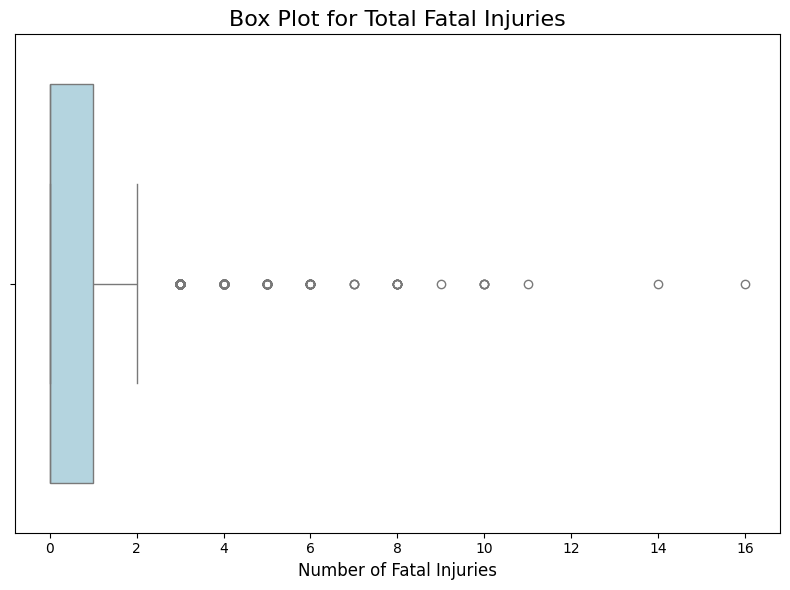

In [29]:
# Box plot for Total Fatal Injuries (horizontal orientation)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='Total.Fatal.Injuries', color='lightblue')
plt.title('Box Plot for Total Fatal Injuries', fontsize=16)
plt.xlabel('Number of Fatal Injuries', fontsize=12)
plt.tight_layout()
plt.show()


### Box plot for Total Fatal Injuries

"The horizontal box plot illustrates the distribution of total fatal injuries across aviation incidents. Most incidents cluster around zero fatalities, as indicated by the narrow interquartile range and the position of the median. However, the presence of multiple outliers highlights cases with significantly higher fatal injuries, extending up to 16 in rare instances."


# Distribution of Aircraft Severe Damage Categories

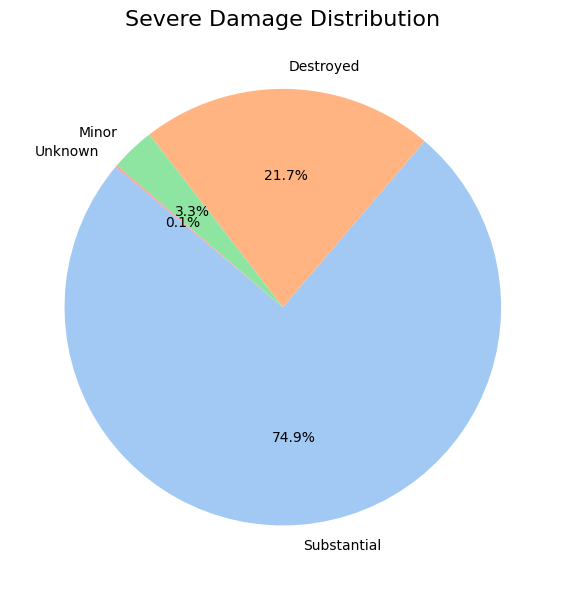

In [30]:
# Count severe damage categories
damage_counts = df['Aircraft.damage'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    damage_counts,
    labels=damage_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Severe Damage Distribution', fontsize=16)
plt.tight_layout()
plt.show()

This pie chart illustrates the proportion of aircraft damage types, with the majority classified as Substantial (74.9%), followed by Destroyed (21.7%), and smaller portions for Minor (3.3%) and Unknown (0.1%) categories. The visualization provides insights into the severity of incidents and their relative frequencies.

### Visualize the distribution of aircraft incidents across the top 10 countries.

Using a log scale highlights smaller countries' contributions while accommodating the wide range of values

In [31]:
# Count the number of incidents by country
incidents_by_country = (
    df_filtered['Country']  # Replace 'Country' with the actual column name in your dataset
    .value_counts()  # Count occurrences per country
    .head(10)  # Get the top 10 countries
)

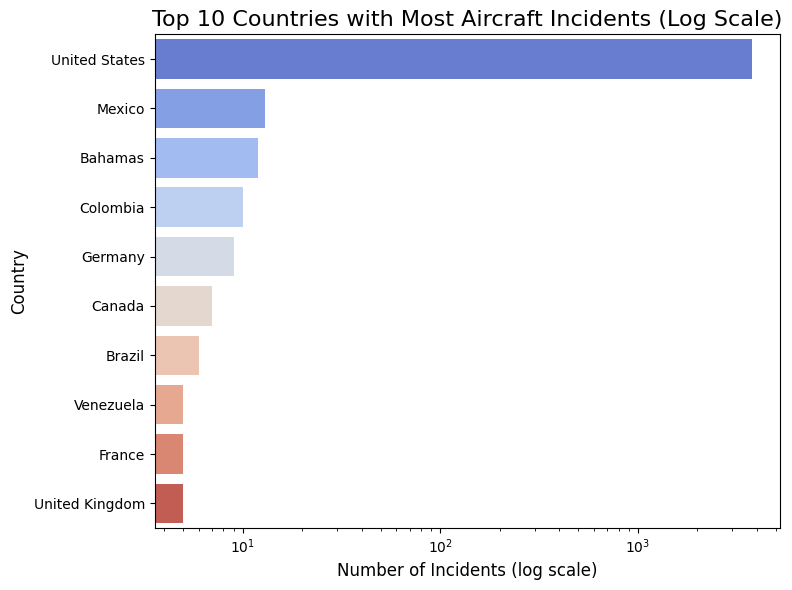

In [32]:
# Bar chart with logarithmic scale (Warning-free)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=incidents_by_country.values,
    y=incidents_by_country.index,
    hue=incidents_by_country.index,  # Assign y-variable as hue
    dodge=False,  # Ensure bars don't split
    palette='coolwarm',
    legend=False  # Remove legend since it doesn't add value
)
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.title('Top 10 Countries with Most Aircraft Incidents (Log Scale)', fontsize=16)
plt.xlabel('Number of Incidents (log scale)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


In [33]:
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>